# Riemann Sums

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Definition

A [Riemann sum](https://en.wikipedia.org/wiki/Riemann_sum) of a function $f(x)$ over a partition

$$
x_0 = a < x_1 < \cdots < x_{N-1} < x_N = b
$$

is a sum of the form

$$
\sum_{i=1}^N f(x_i^ * ) (x_i - x_{i-1}) \ \ , \ x_i^* \in [x_{i-1},x_i]
$$

where each value $x_i^* \in [x_{i-1},x_i]$ in each subinterval is arbitrary.

Riemann sums are important because they provide an easy way to approximate a definite integral

$$
\int_a^b f(x) \, dx \approx \sum_{i=1}^N f(x_i^ * ) (x_i - x_{i-1}) \ \ , \ x_i^* \in [x_{i-1},x_i]
$$

Notice that the product $f(x_i^ * ) (x_i - x_{i-1})$ for each $i$ is the area of a rectangle of height $f(x_i^ * )$ and width $x_i - x_{i-1}$. We can think of a Riemann sum as the area of $N$ rectangles with heights determined by the graph of $y=f(x)$.

The value $x_i^*$ chosen in each subinterval is arbitrary however there are certain obvious choices:

* A *left* Riemann sum is when each $x_i^* = x_{i-1}$ is the left endpoint of the subinterval $[x_{i-1},x_i]$
* A *right* Riemann sum is when each $x_i^* = x_i$ is the right endpoint of the subinterval $[x_{i-1},x_i]$
* A *midpoint* Riemann sum is when each $x_i^* = (x_{i-1} + x_i)/2$ is the midpoint of the subinterval $[x_{i-1},x_i]$

Let's visualize rectangles in the left, right and midpoint Riemann sums for the function

$$
f(x) = \frac{1}{1 + x^2}
$$

over the interval $[0,5]$ with a partition of size $N=10$.

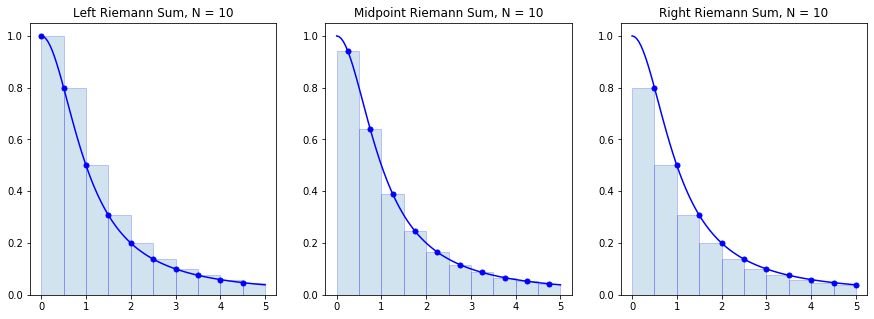

In [2]:
f = lambda x : 1/(1+x**2)
a = 0; b = 5; N = 10
n = 10 # Use n*N+1 points to plot the function smoothly

x = np.linspace(a,b,N+1)
y = f(x)

X = np.linspace(a,b,n*N+1)
Y = f(X)

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.plot(X,Y,'b')
x_left = x[:-1] # Left endpoints
y_left = y[:-1]
plt.plot(x_left,y_left,'b.',markersize=10)
plt.bar(x_left,y_left,width=(b-a)/N,alpha=0.2,align='edge',edgecolor='b')
plt.title('Left Riemann Sum, N = {}'.format(N))

plt.subplot(1,3,2)
plt.plot(X,Y,'b')
x_mid = (x[:-1] + x[1:])/2 # Midpoints
y_mid = f(x_mid)
plt.plot(x_mid,y_mid,'b.',markersize=10)
plt.bar(x_mid,y_mid,width=(b-a)/N,alpha=0.2,edgecolor='b')
plt.title('Midpoint Riemann Sum, N = {}'.format(N))

plt.subplot(1,3,3)
plt.plot(X,Y,'b')
x_right = x[1:] # Left endpoints
y_right = y[1:]
plt.plot(x_right,y_right,'b.',markersize=10)
plt.bar(x_right,y_right,width=-(b-a)/N,alpha=0.2,align='edge',edgecolor='b')
plt.title('Right Riemann Sum, N = {}'.format(N))

plt.show()

Notice that when the function $f(x)$ is decreasing on $[a,b]$ the left endpoints give an overestimate of the integral $\int_a^b f(x) dx$ and right endpoints give an underestimate. The opposite is true is when the function is increasing.

Let's compute the value of each of the Riemann sums:

In [3]:
dx = (b-a)/N
x_left = np.linspace(a,b-dx,N)
x_midpoint = np.linspace(dx/2,b - dx/2,N)
x_right = np.linspace(dx,b,N)

print("Partition with",N,"subintervals.")
left_riemann_sum = np.sum(f(x_left) * dx)
print("Left Riemann Sum:",left_riemann_sum)

midpoint_riemann_sum = np.sum(f(x_midpoint) * dx)
print("Midpoint Riemann Sum:",midpoint_riemann_sum)

right_riemann_sum = np.sum(f(x_right) * dx)
print("Right Riemann Sum:",right_riemann_sum)

Partition with 10 subintervals.
Left Riemann Sum: 1.613488696614725
Midpoint Riemann Sum: 1.373543428316664
Right Riemann Sum: 1.1327194658454942


We know the exact value

$$
\int_0^5 \frac{1}{1 + x^2} dx = \arctan(5)
$$

and we can compare the Riemann sums to the value

In [4]:
I = np.arctan(5)
print(I)

1.373400766945016


In [5]:
print("Left Riemann Sum Error:",np.abs(left_riemann_sum - I))
print("Midpoint Riemann Sum:",np.abs(midpoint_riemann_sum - I))
print("Right Riemann Sum:",np.abs(right_riemann_sum - I))

Left Riemann Sum Error: 0.24008792966970915
Midpoint Riemann Sum: 0.00014266137164820059
Right Riemann Sum: 0.24068130109952168


## Error Formulas

A Riemann sum is an approximation of a definite integral. A natural question arises: how good of an approximation is a Riemann sum?

---

**Theorem.** Let $L_N(f)$ denote the left Riemann sum

$$
L_N(f) = \sum_{i=1}^N f(x_{i-1} ) \Delta x
$$

where $\Delta x = (b-a)/N$ and $x_i = a + i \Delta x$. The error bound is

$$
E_N^{L}(f) = \left| \ \int_a^b f(x) \ dx - L_N(f) \ \right| \leq \frac{(b-a)^2}{2 N} K_1
$$

where $\left| \, f'(x) \, \right| \leq K_1$ for all $x \in [a,b]$.

---

**Theorem.** Let $R_N(f)$ denote the right Riemann sum

$$
R_N(f) = \sum_{i=1}^N f(x_{i} ) \Delta x
$$

where $\Delta x = (b-a)/N$ and $x_i = a + i \Delta x$. The error bound is

$$
E_N^{R}(f) = \left| \ \int_a^b f(x) \ dx - R_N(f) \ \right| \leq \frac{(b-a)^2}{2 N} K_1
$$

where $\left| \, f'(x) \, \right| \leq K_1$ for all $x \in [a,b]$.

---

**Theorem.** Let $M_N(f)$ denote the midpoint Riemann sum

$$
M_N(f) = \sum_{i=1}^N f(x_i^* ) \Delta x
$$

where $\Delta x = (b-a)/N$ and $x_i^* = (x_{i-1} + x_i)/2$ for $x_i = a + i \Delta x$. The error bound is 


$$
E_N^{M}(f) = \left| \ \int_a^b f(x) \ dx - M_N(f) \ \right| \leq \frac{(b-a)^3}{24 N^2} K_2
$$

where $\left| \, f''(x) \, \right| \leq K_2$ for all $x \in [a,b]$.

---

There are several points to notice:

* Left and right Riemann sums have the same error bound which depends on the first derivative $f'(x)$.
* Midpoint Riemann sum error bound depends on the second derivative $f''(x)$.
* We expect the midpoint Riemann sum to give a better approximation as $N \to \infty$ since its error bound is inversely proportional to $N^2$ but left/right Riemann sum error bound is inversely proportional only to $N$.

## Implementation

Let's write a function called `riemann_sum` which takes 5 input parameters `f`, `a`, `b`, `N` and `method` and returns the Riemann sum

$$
\sum_{i=1}^N f(x_i^*) \Delta x
$$

where $\Delta x = (b-a)/N$ and $x_i = a + i\Delta x$ defines a partition with $N$ subintervals of *equal length*, and `method` determines whether we use *left* endpoints, *right* endpoints or *midpoints* (with midpoints as the default method).

In [6]:
def riemann_sum(f,a,b,N,method='midpoint'):
    '''Compute the Riemann sum of f(x) over the interval [a,b].

    Parameters
    ----------
    f : function
        Vectorized function of one variable
    a , b : numbers
        Endpoints of the interval [a,b]
    N : integer
        Number of subintervals of equal length in the partition of [a,b]
    method : string
        Determines the kind of Riemann sum:
        right : Riemann sum using right endpoints
        left : Riemann sum using left endpoints
        midpoint (default) : Riemann sum using midpoints

    Returns
    -------
    float
        Approximation of the integral given by the Riemann sum.
    '''
    dx = (b - a)/N
    x = np.linspace(a,b,N+1)
    
    if method == 'left':
        x_left = x[:-1]
        return np.sum(f(x_left)*dx)
    elif method == 'right':
        x_right = x[1:]
        return np.sum(f(x_right)*dx)
    elif method == 'midpoint':
        x_mid = (x[:-1] + x[1:])/2
        return np.sum(f(x_mid)*dx)
    else:
        raise ValueError("Method must be 'left', 'right' or 'midpoint'.")

Let's test our function with inputs where we know exactly what the output should be. For example, we know

$$
\int_0^{\pi/2} \sin(x) \, dx = 1
$$

and, since $\sin(x)$ is increasing on $[0,\pi/2]$, we know that left endpoints will give an under-estimate, and right endpoints will give an over-estimate.

In [7]:
riemann_sum(np.sin,0,np.pi/2,100)

1.0000102809119054

In [8]:
riemann_sum(np.sin,0,np.pi/2,100,'right')

1.007833419873582

In [9]:
riemann_sum(np.sin,0,np.pi/2,100,'left')

0.992125456605633

We also know that $\int_0^1 x \, dx = 1/2$ and midpoint should give the result exactly for any $N$:

In [10]:
riemann_sum(lambda x : x,0,1,1)

0.5

## Examples

### Approximate Pi

Find a value $N$ which guarantees the right Riemann sum of $f(x)=\frac{4}{1 + x^2}$ over $[0,1]$ is within $10^{-5}$ of the exact value

$$
\int_0^1 \frac{4}{1 + x^2} dx = \pi
$$

Compute

$$
f'(x) = -\frac{8x}{(1+x^2)^2}
$$

Use brute force optimization to find a bound on $\left| f'(x) \right|$ on $[0,1]$:

In [11]:
x = np.linspace(0,1,1000)
y = np.abs(-8*x/(1 + x**2)**2)
np.max(y)

2.5980759093919907

Therefore, $\left| f'(x) \right| \leq 2.6$ for $x \in [0,1]$. Use the error bound

$$
\frac{(b-a)^2}{2 N} K_1 \leq 10^{-5} \ \Rightarrow \ \frac{1.3}{N} \leq 10^{-5} \ \Rightarrow \ 130000 \leq N
$$

Let's compute the right Riemann sum for $N=130000$:

In [12]:
approximation = riemann_sum(lambda x : 4/(1 + x**2),0,1,130000,method='right')
print(approximation)

3.1415849612722386


Verify the accuracy of the approximation

In [13]:
np.abs(approximation - np.pi) < 10**(-5)

True

### Approximate ln(2)

Find a value $N$ which guarantees the midpoint Riemann sum of $f(x)=\frac{1}{x}$ over $[1,2]$ is within $10^{-8}$ of the exact value

$$
\int_1^2 \frac{1}{x} dx = \ln(2)
$$

Compute

$$
f''(x) = \frac{2}{x^3}
$$

Since $f''(x)$ is decreasing for all $x>0$ we have $\left| \, f''(x) \, \right| \leq 2$ for all $x \in [1,2]$. Use the error bound:

$$
\frac{(b-a)^3}{24 N^2} K_2 \leq 10^{-8} \ \Rightarrow \ \frac{1}{12 N^2} \leq 10^{-8} \ \Rightarrow \frac{10^4}{\sqrt{12}} \leq N
$$

In [14]:
10**4 / np.sqrt(12)

2886.751345948129

Therefore a partition of size $N=2887$ guarantees the desired accuracy:

In [15]:
approximation = riemann_sum(lambda x : 1/x,1,2,2887,method='midpoint')
print(approximation)

0.6931471768105913


Verify the accuracy of the approximation:

In [16]:
np.abs(approximation - np.log(2)) < 10**(-8)

True

## Exercises

1. Consider the integral

    $$
    \int_1^2 \frac{dx}{1+x^3}
    $$
    
    **Without plotting the functions** $f(x)$, $f'(x)$ or $f''(x)$, find a value $N$ such that $E_N^R(f) \leq 10^{-5}$ given
    
    $$
    f(x) = \frac{1}{1 + x^3} \ , \ f'(x) = -\frac{3 x^{2}}{\left(x^{3} + 1\right)^{2}} \ , \ f''(x) = \frac{6 x \left(2 x^{3} - 1\right)}{\left(x + 1\right)^{3} \left(x^{2} - x + 1\right)^{3}} \\\\
    $$

2. Plot the function $f''(x)$ from the previous question on the interval $[1,2]$ and find a value $N$ such that $E_N^M(f) \leq 10^{-5}$ for the integral in the previous question.

3. Let $f(x) = x^x$ and note that

    $$
    f'(x) = x^{x} \left(\log{\left(x \right)} + 1\right) \ , \ f''(x) = x^{x} \left(\log{\left(x \right)} + 1\right)^{2} + x^{x-1}
    $$
    
    Plot the function $f''(x)$ and use that information to compute $T_N(f)$ for the integral
    
    $$
    \int_1^2 x^x \, dx
    $$
    
    such that $E_N^T(f) \leq 10^{-3}$.